<a href="https://colab.research.google.com/github/Geo-y20/Mall-Shoppers-Customer-Segmentation-Analysis/blob/main/Mall_Shoppers_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Shoppers Customer Segmentation Analysis
This notebook provides a comprehensive analysis of the Mall Shoppers Customer Segmentation dataset. The analysis includes data cleaning, transformation, and application of various clustering techniques.

About Dataset
Mall Shoppers Customer Segmentation Dataset

**Overview:**

The Mall Shoppers Customer Segmentation Dataset is a rich collection of data designed to provide insights into the shopping behaviors and demographic profiles of customers visiting a mall. This dataset is pivotal for businesses aiming to tailor their marketing strategies, improve customer engagement, and enhance the shopping experience through targeted offers and services.

**Content:**

The dataset includes information on several hundred mall visitors, encompassing a variety of features such as:

- Customer ID: A unique identifier for each customer.
- Age: The age of the customer.
- Gender: The gender of the customer.
- Annual Income (k$): The annual income of the customer, expressed in thousands of dollars.
- Spending Score (1-100): A score assigned to the customer based on their spending behavior and purchasing data. A higher score indicates higher spending.

**Purpose:**

The primary purpose of this dataset is to enable the identification of distinct customer segments within the mall's clientele. By analyzing patterns in age, income, spending score, and gender, businesses can uncover valuable insights into customer preferences and behaviors. This, in turn, allows for the development of targeted marketing strategies, personalized shopping experiences, and improved product offerings to meet the diverse needs of each customer segment.

**Applications:**

This dataset is an excellent resource for:

- Customer Segmentation: Utilizing clustering techniques to categorize customers into meaningful groups based on their features.
- Targeted Marketing: Crafting personalized marketing campaigns aimed at specific customer segments to increase engagement and sales.
- Market Analysis: Understanding the demographic makeup and spending habits of mall visitors to inform business decisions and strategies.
- Personalization: Enhancing the customer experience through personalized services, recommendations, and offers.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1: Data Cleaning
### Checking for Null and Duplicate Values

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data Mining Project/Mall_Customers.csv'
mall_data = pd.read_csv(file_path)

# Check for null values
null_values = mall_data.isnull().sum()
print('Null values in each column:\n', null_values)

# Check for duplicate values
duplicate_values = mall_data.duplicated().sum()
print('Number of duplicate rows:', duplicate_values)

Null values in each column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Number of duplicate rows: 0


## Part 2: Data Transformation
### Min-Max Scaling and Z-Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
print('Data after Min-Max Scaling:\n', mall_data.head())

# Apply Z-Scaling
scaler = StandardScaler()
mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
print('Data after Z-Scaling:\n', mall_data.head())

Data after Min-Max Scaling:
    CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  0.019231            0.000000                0.387755
1           2    Male  0.057692            0.000000                0.816327
2           3  Female  0.038462            0.008197                0.051020
3           4  Female  0.096154            0.008197                0.775510
4           5  Female  0.250000            0.016393                0.397959
Data after Z-Scaling:
    CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980


## Part 3: Clustering Techniques
### K-means Clustering (Implemented from Scratch)

In [ ]:
import numpy as np

def initialize_centroids(data, k):
    np.random.seed(42)
    random_indices = np.random.permutation(data.shape[0])
    centroids = data[random_indices[:k]]
    return centroids

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(iterations):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Prepare data for clustering
data = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply K-means clustering
k = 5  # Number of clusters
centroids, labels = kmeans(data, k)
print('Centroids from implemented K-means:\n', centroids)

Centroids from implemented K-means:
 [[-0.42880597  0.97484722  1.21608539]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.5310735  -1.2905084  -1.23646671]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 1.20484056 -0.23577338 -0.05236781]]


### K-means Clustering using Sklearn

In [ ]:
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters=5, random_state=42)
kmeans_sklearn.fit(data)
sklearn_centroids = kmeans_sklearn.cluster_centers_
sklearn_labels = kmeans_sklearn.labels_
print('Centroids from Sklearn K-means:\n', sklearn_centroids)

Centroids from Sklearn K-means:
 [[ 1.20484056 -0.23577338 -0.05236781]
 [-0.42880597  0.97484722  1.21608539]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.5310735  -1.2905084  -1.23646671]
 [ 0.07333084  0.97494509 -1.19729675]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Comparison of Centroids

In [ ]:
centroids_comparison = pd.DataFrame({
    'Implemented K-means': centroids.flatten(),
    'Sklearn K-means': sklearn_centroids.flatten()
})
print(centroids_comparison)

    Implemented K-means  Sklearn K-means
0             -0.428806         1.204841
1              0.974847        -0.235773
2              1.216085        -0.052368
3             -0.980679        -0.428806
4             -0.743060         0.974847
5              0.467440         1.216085
6              0.531074        -0.980679
7             -1.290508        -0.743060
8             -1.236467         0.467440
9              0.073331         0.531074
10             0.974945        -1.290508
11            -1.197297        -1.236467
12             1.204841         0.073331
13            -0.235773         0.974945
14            -0.052368        -1.197297


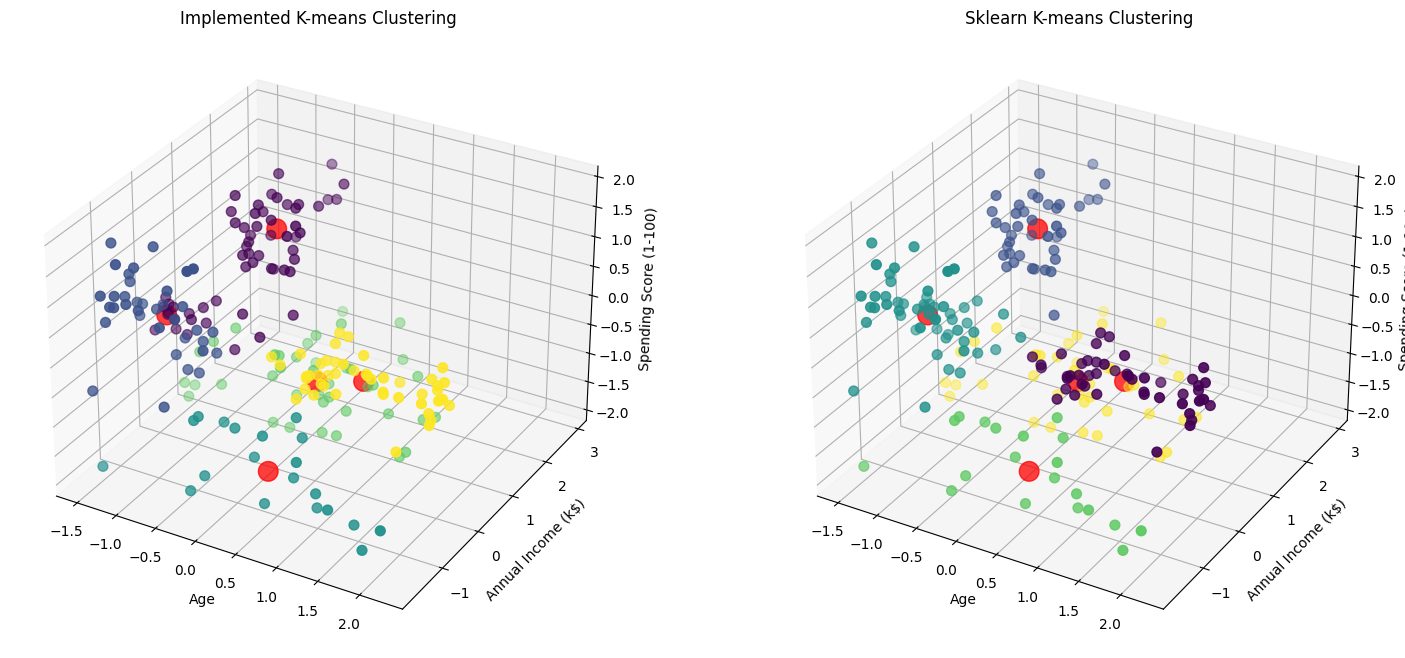

In [ ]:
# Plot the data points and the centroids for both implemented and Sklearn K-means
fig = plt.figure(figsize=(18, 8))

# Implemented K-means
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=50, cmap='viridis')
ax1.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.75)
ax1.set_title('Implemented K-means Clustering')
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income (k$)')
ax1.set_zlabel('Spending Score (1-100)')

# Sklearn K-means
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=sklearn_labels, s=50, cmap='viridis')
ax2.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], sklearn_centroids[:, 2], c='red', s=200, alpha=0.75)
ax2.set_title('Sklearn K-means Clustering')
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_zlabel('Spending Score (1-100)')

plt.show()

### K-medoids Clustering from scartch

In [ ]:
import numpy as np

def k_medoids(data, k, max_iter=100):
    # Initialize medoids randomly
    np.random.seed(42)
    medoid_indices = np.random.choice(len(data), k, replace=False)
    medoids = data[medoid_indices]

    for _ in range(max_iter):
        # Assign each point to the nearest medoid
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - medoids, axis=2), axis=1)

        # Update medoids
        new_medoids = np.array([data[labels == i][np.argmin(np.sum(np.linalg.norm(data[labels == i][:, np.newaxis] - data[labels == i], axis=2), axis=1))] for i in range(k)])

        # Check for convergence
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Prepare data for clustering
data = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply K-medoids clustering
k = 5  # Number of clusters
medoids, labels = k_medoids(data, k)
print('Medoids from implemented K-medoids:\n', medoids)


Medoids from implemented K-medoids:
 [[-0.49160182  0.62750542  0.92395314]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.7284319  -1.05194947 -1.4053405 ]
 [ 0.22606507  0.97103028 -1.17241113]
 [ 1.30256542 -0.25039146  0.03105725]]


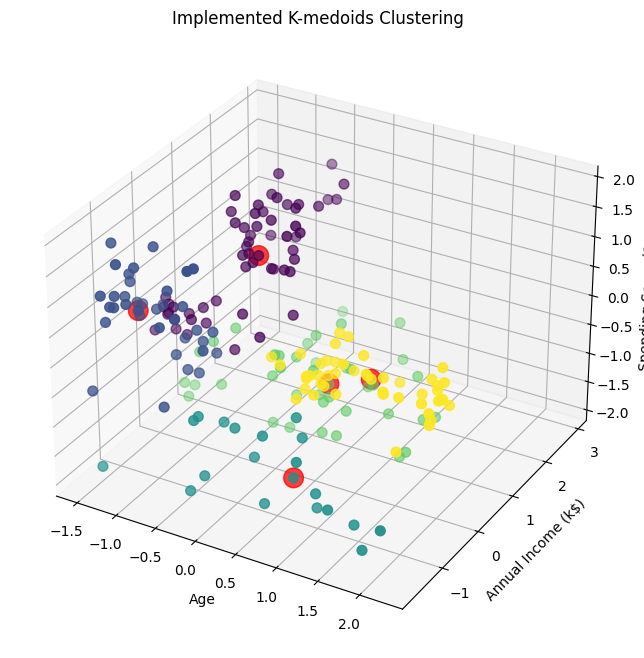

In [ ]:
# Plot the data points and the centroids for implemented K-medoids
fig = plt.figure(figsize=(10, 8))

# Implemented K-medoids
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels_medoids, s=50, cmap='viridis')
ax.scatter(medoids[:, 0], medoids[:, 1], medoids[:, 2], c='red', s=200, alpha=0.75)
ax.set_title('Implemented K-medoids Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

### K-medoids Clustering using Sklearn



In [ ]:
! pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids.fit(data)
kmedoids_centroids = kmedoids.cluster_centers_
kmedoids_labels = kmedoids.labels_

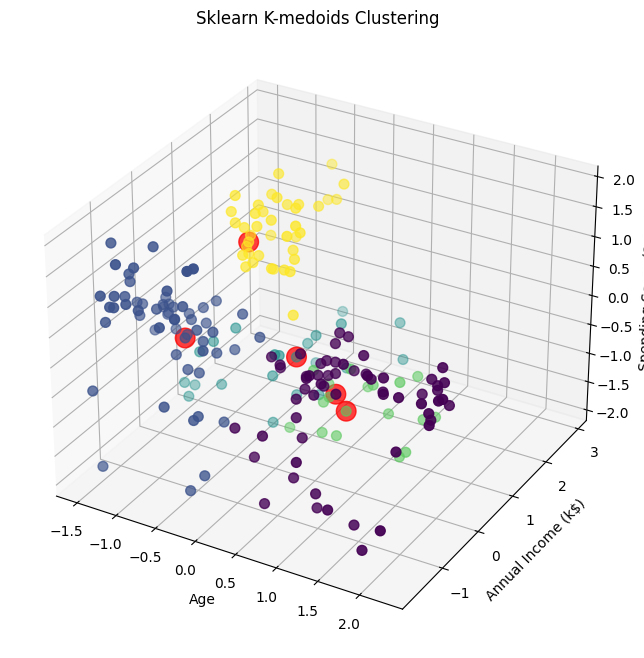

In [ ]:
# Plot K-medoids results
fig = plt.figure(figsize=(9, 8))

ax3 = fig.add_subplot(111, projection='3d')
ax3.scatter(data[:, 0], data[:, 1], data[:, 2], c=kmedoids_labels, s=50, cmap='viridis')
ax3.scatter(kmedoids_centroids[:, 0], kmedoids_centroids[:, 1], kmedoids_centroids[:, 2], c='red', s=200, alpha=0.75)
ax3.set_title('Sklearn K-medoids Clustering')
ax3.set_xlabel('Age')
ax3.set_ylabel('Annual Income (k$)')
ax3.set_zlabel('Spending Score (1-100)')

plt.show()

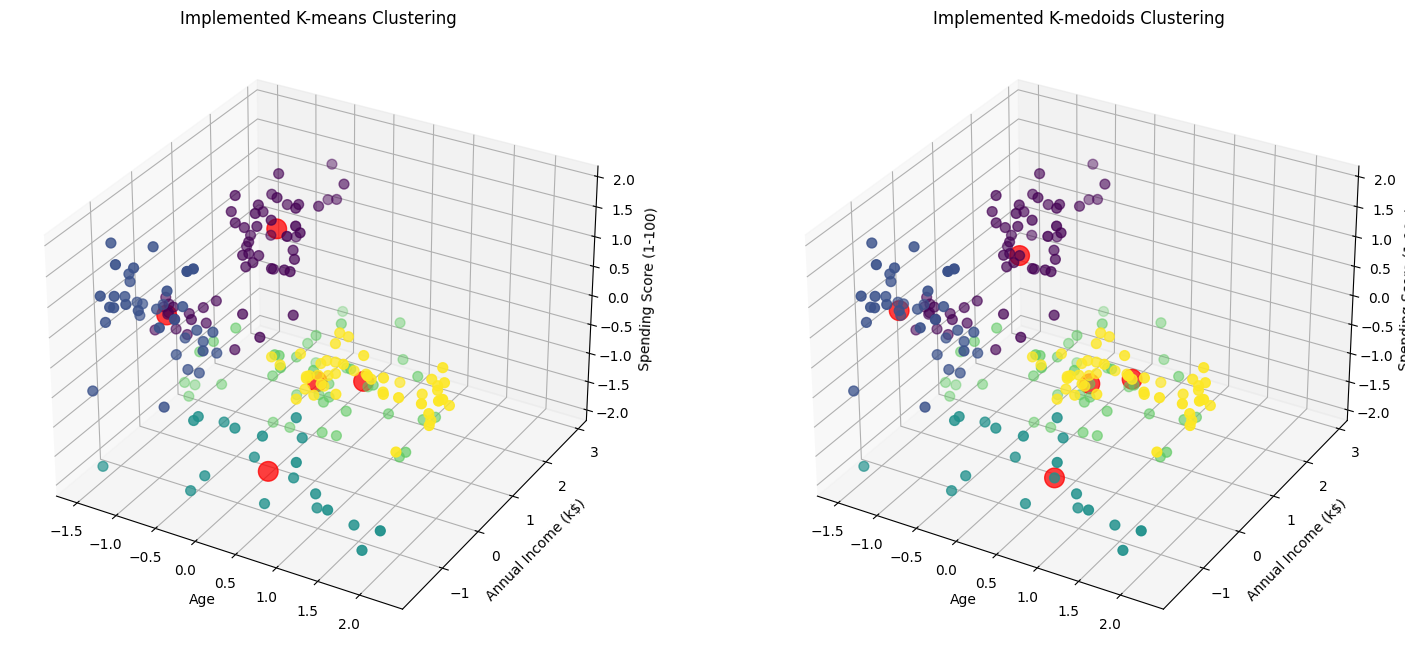

In [ ]:
# Apply K-medoids clustering from scratch
medoids, labels_medoids = k_medoids(data, k)

# Plot the data points and the centroids for both implemented K-means and K-medoids
fig = plt.figure(figsize=(18, 8))

# Implemented K-means
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=50, cmap='viridis')
ax1.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.75)
ax1.set_title('Implemented K-means Clustering')
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income (k$)')
ax1.set_zlabel('Spending Score (1-100)')

# Implemented K-medoids
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels_medoids, s=50, cmap='viridis')
ax2.scatter(medoids[:, 0], medoids[:, 1], medoids[:, 2], c='red', s=200, alpha=0.75)
ax2.set_title('Implemented K-medoids Clustering')
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_zlabel('Spending Score (1-100)')

plt.show()

### Hierarchical Clustering and Dendrogram

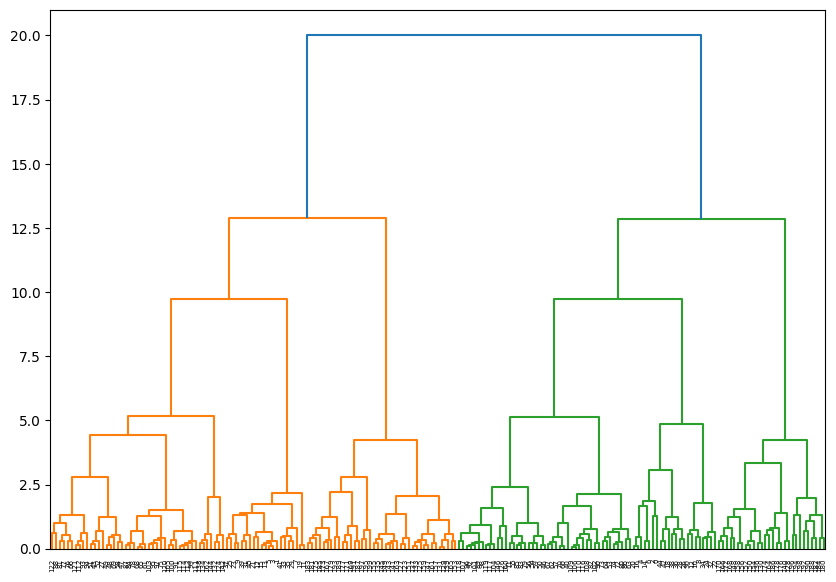

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

### Density-based Clustering using DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)
dbscan_labels = dbscan.labels_
print('Labels from DBSCAN:\n', dbscan_labels)

Labels from DBSCAN:
 [-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  1  0 -1 -1  1  0 -1  0
 -1  0  1 -1  1  0 -1  0 -1  0 -1  0 -1  0  1  0 -1  0  2  3  2 -1  2  3
  3  3  2  3  3  2  2  2  2  2  3  2  2  3  2  2  2  3  2  2  3  3  2  2
  2  2  2  3  2  2  3  2  2  2  2  2  3  2  2  3 -1  2  2  3  2  2  2  3
  2  3  2  3  3  2  2  3  2  3  2  2  2  2  2  3  2  3  3  3  2  2  2  2
  3  2 -1  4 -1  4 -1  4 -1  4  5  4  3  4 -1  4  5  4 -1  4 -1  4 -1  4
 -1  4 -1  4 -1  4  5  4  5  4  5  4 -1  4 -1  4 -1  4 -1  4 -1  4  5  4
 -1 -1  5  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1 -1 -1  4 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


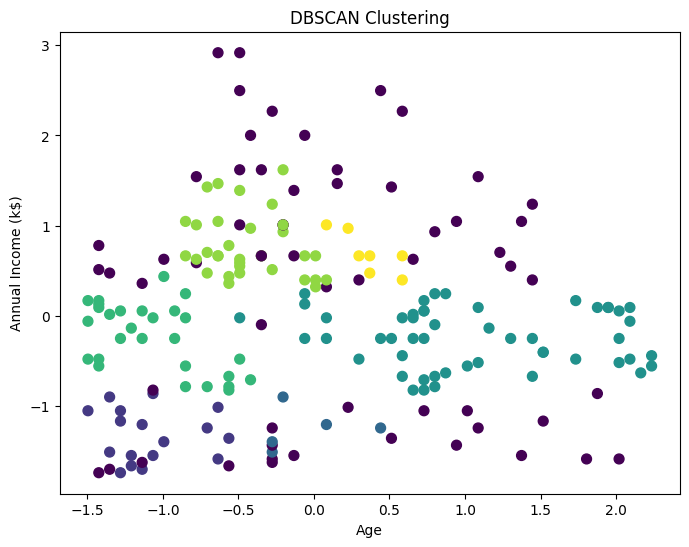

In [ ]:

fig = plt.figure(figsize=(8, 6))

plt.scatter(data[:, 0], data[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()
